In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("dataset/onlinefoods.csv")
df.head()

,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,latitude,longitude,Pin code,Output,Feedback,Unnamed: 12
0,20,Female,Single,Student,No Income,Post Graduate,4,12.9766,77.5993,560001,Yes,Positive,Yes
1,24,Female,Single,Student,Below Rs.10000,Graduate,3,12.9770,77.5773,560009,Yes,Positive,Yes
2,22,Male,Single,Student,Below Rs.10000,Post Graduate,3,12.9551,77.6593,560017,Yes,Negative,Yes
3,22,Female,Single,Student,No Income,Graduate,6,12.9473,77.5616,560019,Yes,Positive,Yes
4,22,Male,Single,Student,Below Rs.10000,Post Graduate,4,12.9850,77.5533,560010,Yes,Positive,Yes


In [4]:
df.shape

(388, 13)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         388 non-null    int64  
 1   Gender                      388 non-null    object 
 2   Marital Status              388 non-null    object 
 3   Occupation                  388 non-null    object 
 4   Monthly Income              388 non-null    object 
 5   Educational Qualifications  388 non-null    object 
 6   Family size                 388 non-null    int64  
 7   latitude                    388 non-null    float64
 8   longitude                   388 non-null    float64
 9   Pin code                    388 non-null    int64  
 10  Output                      388 non-null    object 
 11  Feedback                    388 non-null    object 
 12  Unnamed: 12                 388 non-null    object 
dtypes: float64(2), int64(3), object(8)


In [6]:
df.describe()

,Age,Family size,latitude,longitude,Pin code
count,388.000000,388.000000,388.000000,388.000000,388.000000
mean,24.628866,3.280928,12.972058,77.600160,560040.113402
std,2.975593,1.351025,0.044489,0.051354,31.399609
min,18.000000,1.000000,12.865200,77.484200,560001.000000
25%,23.000000,2.000000,12.936900,77.565275,560010.750000
50%,24.000000,3.000000,12.977000,77.592100,560033.500000
75%,26.000000,4.000000,12.997025,77.630900,560068.000000
max,33.000000,6.000000,13.102000,77.758200,560109.000000


In [7]:
df.isna().sum()

Age                           0
Gender                        0
Marital Status                0
Occupation                    0
Monthly Income                0
Educational Qualifications    0
Family size                   0
latitude                      0
longitude                     0
Pin code                      0
Output                        0
Feedback                      0
Unnamed: 12                   0
dtype: int64

In [9]:
df.duplicated().sum()

103

In [10]:
df = df.drop_duplicates()

In [11]:
df["Monthly Income"].value_counts()

No Income          131
25001 to 50000      52
More than 50000     47
10001 to 25000      36
Below Rs.10000      19
Name: Monthly Income, dtype: int64

In [15]:
df['Monthly Income'].mask(df['Monthly Income'] == 'No Income', 0, inplace=True)
df['Monthly Income'].mask(df['Monthly Income'] == 'Below Rs.10000', "less 10000", inplace=True)
df['Monthly Income'].mask(df['Monthly Income'] == '25001 to 50000', "25001 - 50000", inplace=True)
df['Monthly Income'].mask(df['Monthly Income'] == '10001 to 25000', "10001 - 25000", inplace=True)
df['Monthly Income'].mask(df['Monthly Income'] == 'More than 50000', "more 50000", inplace=True)

C:\Users\nuvolaofficial\AppData\Local\Temp\ipykernel_344\4194388655.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Monthly Income'].mask(df['Monthly Income'] == 'No Income', 0, inplace=True)
C:\Users\nuvolaofficial\AppData\Local\Temp\ipykernel_344\4194388655.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Monthly Income'].mask(df['Monthly Income'] == 'Below Rs.10000', "less 10000", inplace=True)
C:\Users\nuvolaofficial\AppData\Local\Temp\ipykernel_344\4194388655.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https:

In [19]:
df.rename(columns = {'Unnamed: 12':'satisfaction'}, inplace = True) 

C:\Users\nuvolaofficial\AppData\Local\Temp\ipykernel_344\2543583955.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns = {'Unnamed: 12':'satisfaction'}, inplace = True)


In [20]:
df

,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,latitude,longitude,Pin code,Output,Feedback,satisfaction
0,20,Female,Single,Student,0,Post Graduate,4,12.9766,77.5993,560001,Yes,Positive,Yes
1,24,Female,Single,Student,less 10000,Graduate,3,12.9770,77.5773,560009,Yes,Positive,Yes
2,22,Male,Single,Student,less 10000,Post Graduate,3,12.9551,77.6593,560017,Yes,Negative,Yes
3,22,Female,Single,Student,0,Graduate,6,12.9473,77.5616,560019,Yes,Positive,Yes
4,22,Male,Single,Student,less 10000,Post Graduate,4,12.9850,77.5533,560010,Yes,Positive,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...
355,21,Male,Single,Student,0,Graduate,2,13.0012,77.5995,560046,No,Positive,No
363,31,Male,Married,Employee,more 50000,Ph.D,3,12.9306,77.5434,560085,Yes,Positive,Yes
369,30,Male,Married,Employee,more 50000,Post Graduate,6,12.9369,77.6407,560095,Yes,Positive,Yes
374,21,Male,Single,Student,0,Graduate,3,13.0641,77.5931,560092,Yes,Negative,Yes


In [24]:
df.drop(["latitude", "longitude", "Pin code"],axis=1, inplace = True)

KeyError: "['latitude', 'longitude', 'Pin code'] not found in axis"

In [26]:
df.drop(["Output"], axis = 1, inplace = True)

C:\Users\nuvolaofficial\AppData\Local\Temp\ipykernel_344\3210685337.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(["Output"], axis = 1, inplace = True)


In [29]:
df.head(10)

,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,Feedback,satisfaction
0,20,Female,Single,Student,0,Post Graduate,4,Positive,Yes
1,24,Female,Single,Student,less 10000,Graduate,3,Positive,Yes
2,22,Male,Single,Student,less 10000,Post Graduate,3,Negative,Yes
3,22,Female,Single,Student,0,Graduate,6,Positive,Yes
4,22,Male,Single,Student,less 10000,Post Graduate,4,Positive,Yes
5,27,Female,Married,Employee,more 50000,Post Graduate,2,Positive,Yes
6,22,Male,Single,Student,0,Graduate,3,Positive,Yes
7,24,Female,Single,Student,0,Post Graduate,3,Positive,Yes
8,23,Female,Single,Student,0,Post Graduate,2,Positive,Yes
9,23,Female,Single,Student,0,Post Graduate,4,Positive,Yes


In [40]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [41]:
label_encoder = LabelEncoder()
df['Gender'] = label_encoder.fit_transform(df['Gender'])
df['Marital Status'] = label_encoder.fit_transform(df['Marital Status'])
df['Occupation'] = label_encoder.fit_transform(df['Occupation'])
df['Monthly Income'] = label_encoder.fit_transform(df['Monthly Income'].astype(str))  # Konversi ke string sebelum label encoding
df['Educational Qualifications'] = label_encoder.fit_transform(df['Educational Qualifications'])
df['Feedback'] = label_encoder.fit_transform(df['Feedback'])
df['satisfaction'] = label_encoder.fit_transform(df['satisfaction'])


C:\Users\nuvolaofficial\AppData\Local\Temp\ipykernel_344\3817509841.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Gender'] = label_encoder.fit_transform(df['Gender'])
C:\Users\nuvolaofficial\AppData\Local\Temp\ipykernel_344\3817509841.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Marital Status'] = label_encoder.fit_transform(df['Marital Status'])
C:\Users\nuvolaofficial\AppData\Local\Temp\ipykernel_344\3817509841.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a 

In [42]:
# Memisahkan fitur dan label
X = df.drop('satisfaction', axis=1)
y = df['satisfaction']

In [43]:
# Membagi data menjadi data pelatihan dan pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [44]:
# Membuat model RandomForest
model = RandomForestClassifier(random_state=42)

In [45]:
# Cross-validation
cv_scores = cross_val_score(model, X, y, cv=5)  # 5-fold cross-validation
print(f'Cross-Validation Scores: {cv_scores}')
print(f'Mean CV Score: {cv_scores.mean()}')

Cross-Validation Scores: [0.73684211 0.84210526 0.78947368 0.8245614  0.77192982]
Mean CV Score: 0.7929824561403509


In [46]:
# Melatih model
model.fit(X_train, y_train)
# Membuat prediksi
y_pred = model.predict(X_test)

In [47]:
# Evaluasi model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{class_report}')

Accuracy: 0.8421052631578947
Confusion Matrix:
[[ 7  6]
 [ 3 41]]
Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.54      0.61        13
           1       0.87      0.93      0.90        44

    accuracy                           0.84        57
   macro avg       0.79      0.74      0.75        57
weighted avg       0.83      0.84      0.83        57



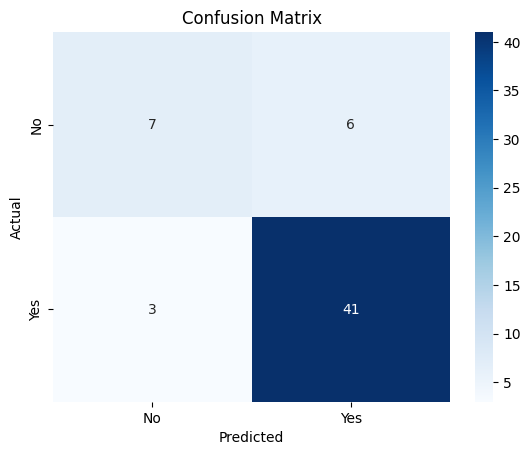

In [49]:
import seaborn as sns
# Menampilkan matrix kebingungan dengan seaborn
labels = ['No', 'Yes']  # Sesuaikan dengan label kelas Anda
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()